Scrape Victoria rooftop solar per month from Sydney Morning Herald (https://www.smh.com.au/environment/sustainability/solar-installations-go-through-the-roof-despite-victoria-s-lockdown-20201006-p562h4.html)

In [2]:
import requests
from bs4 import BeautifulSoup

Chart from the article is based on the data from Green Energy Markets.

In [10]:
url = "https://e.infogr.am/solar-power-generated-by-state-1h7z2lym9dve4ow?live?parent_url=https%3A%2F%2Fwww.smh.com.au%2Fenvironment%2Fsustainability%2Fsolar-installations-go-through-the-roof-despite-victoria-s-lockdown-20201006-p562h4.html&src=embed#igc-cp-chart-1"
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")

In [25]:
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge, Chrome=1" http-equiv="X-UA-Compatible">
   <meta content="on" http-equiv="x-dns-prefetch-control"/>
   <title>
    Solar power generated by state' - Infogram
   </title>
   <!--[if lt IE 9]>
    <script src="https://cdn.jifo.co/js/dist/assets-embed_view_polyfills-1f11eacd68fa4125c7a4-1-webpack.js" class="app-bundle" crossorigin="anonymous"></script>
    <![endif]-->
   <script>
    function browserIsIE() {
            var userAgent = window.navigator.userAgent;
            return userAgent.indexOf('MSIE ') !== -1 //IE < 11
                || userAgent.indexOf('Trident/') !== -1 // IE 11
        }

        if (browserIsIE()) {
            window.errorLog = [];
            var newLocation = window.location.toString().split('#');
            if (newLocation[0].indexOf('&retry=1') < 0) {
                window.onunhandledrejection = function(event)  {
                    if (event.reason && event.r

In [69]:
import re

pttn = re.compile("""\:\[\[\[.*\]\]\]""")
script = soup.find("script", text = pttn)

In [76]:
script.prettify()

'<script>\n window.infographicData={"id":184718079,"type":0,"block_id":"aa9c5ab3-d6ab-4bfe-907e-cda168af8690","theme_id":11401,"user_id":2230123,"team_user_id":2236888,"path":"ce0489e4-e31f-47b7-8c25-5b474212e4ee","title":"Solar power generated by state\'","description":"","tags":"","public":true,"publicAccess":false,"private_link_enabled":0,"thumb":"https:\\u002F\\u002Finfogram-thumbs-200.s3-eu-west-1.amazonaws.com\\u002Faa9c5ab3-d6ab-4bfe-907e-cda168af8690.jpg","embedImageUrl":"https:\\u002F\\u002Finfogram.io\\u002Fp\\u002F8534e3ce096e5da43093cdc139ddf51d.png","previewImageUrl":"https:\\u002F\\u002Finfogram.io\\u002Fp\\u002F80892d94ccb22b92370779c40010b30d.png","width":550,"copyright":"","properties":{"tabs":true,"embed_button":"none","zeropaddingembed":true,"custom_logo":"none","allowToShare":false,"language":"en","logoName":"Infogram logo","publishType":0,"transparent":false,"rtl":false,"export_settings":{"showGrid":true,"showValues":true},"whitelabel":true,"noTracking":false,"deci

Regex does not like some characters in the text, so copy from here.

In [89]:
data = [[["Past GDP","NSW","VIC","QLD","WA","SA","TAS","NT","","ACT"],["Jan 2015","12,939","11,487","15,475","7,970","5,163",802,433,"",796],["Feb 2015","15,414","13,856","15,505","6,738","5,491",716,478,"",490],["Mar 2015","18,203","15,387","17,391","7,573","5,585","1,254",557,"",488],["Apr 2015","14,001","11,860","16,107","7,160","5,145",620,817,"",559],["May 2015","13,979","11,625","14,831","7,885","5,124",514,428,"",401],["Jun 2015","14,090","11,296","15,796","7,645","5,815",872,605,"",166],["Jul 2015","16,063","14,019","19,840","8,060","5,991",816,719,"",530],["Aug 2015","15,956","12,102","17,107","8,464","6,035",845,477,"",460],["Sep 2015","14,761","13,094","17,240","7,984","5,588",627,"1,167","",449],["Oct 2015","14,473","12,123","15,806","8,809","6,030",754,"1,035","",323],["Nov 2015","13,896","10,745","14,765","8,390","5,446",639,869,"",660],["Dec 2015","14,639","12,781","14,963","8,055","6,071","1,250",836,"",817],["Jan 2016","9,493","9,117","11,870","7,956","4,400",671,543,"",385],["Feb 2016","13,120","11,693","13,512","8,589","5,373",953,785,"",551],["Mar 2016","12,079","11,642","14,240","8,801","5,711",959,516,"",897],["Apr 2016","12,365","10,914","13,155","9,045","4,905",852,729,"",460],["May 2016","13,287","13,224","14,275","10,941","5,147",985,"1,182","",668],["Jun 2016","12,686","11,621","14,900","10,897","5,717","1,069","1,203","",669],["Jul 2016","11,847","11,809","15,158","10,792","5,275",961,"1,133","",521],["Aug 2016","14,949","10,966","16,628","11,155","6,971",935,"1,166","",453],["Sep 2016","13,525","11,953","16,318","11,077","6,839",943,"1,054","",570],["Oct 2016","12,486","11,483","16,851","9,426","5,348",914,"1,147","",493],["Nov 2016","15,434","11,284","20,161","12,638","7,438","1,098","1,378","",600],["Dec 2016","16,512","14,050","24,612","13,654","8,750","1,180",758,"",590],["Jan 2017","14,156","11,981","17,248","13,111","6,554",681,"1,046","",345],["Feb 2017","15,881","12,356","19,678","13,510","6,766","1,181",935,"",886],["Mar 2017","19,800","15,738","23,987","16,542","8,789","1,257",754,"",739],["Apr 2017","16,168","12,125","17,299","12,672","6,723",533,899,"",474],["May 2017","20,471","16,973","25,559","14,944","8,358","1,115",949,"",915],["Jun 2017","19,560","16,403","26,003","15,680","7,262","1,079","1,758","",933],["Jul 2017","20,820","15,551","23,854","16,008","7,919","1,142","1,725","",597],["Aug 2017","22,955","17,040","25,425","15,596","8,844","1,263","1,354","","1,163"],["Sep 2017","22,040","16,047","26,229","14,043","9,684","1,191","1,483","","1,278"],["Oct 2017","23,424","19,331","27,448","17,083","10,939","1,346","1,473","","1,089"],["Nov 2017","29,298","19,263","33,987","16,368","13,993","1,402","1,388","","1,421"],["Dec 2017","27,389","18,586","31,227","17,684","11,525","1,754","1,663","",963],["Jan 2018","24,932","21,183","26,594","16,187","13,250","1,183","1,658","","1,265"],["Feb 2018","27,716","21,628","28,168","18,129","14,522","1,391",841,"","1,353"],["Mar 2018","30,630","22,782","30,359","17,944","15,191","1,687","1,262","","1,912"],["Apr 2018","29,327","19,977","24,221","16,072","10,345","1,334","1,249","","1,445"],["May 2018","38,050","23,609","31,171","16,816","12,877","1,328","1,125","","1,968"],["Jun 2018","31,474","23,694","33,825","14,325","13,138","1,332","1,365","","1,992"],["Jul 2018","36,472","25,264","35,051","16,070","14,642","1,556","1,205","","2,217"],["Aug 2018","39,319","24,694","35,577","16,226","14,874","1,669","2,002","","2,107"],["Sep 2018","30,869","23,648","31,563","16,477","13,428","1,128","1,394","","2,251"],["Oct 2018","37,954","35,445","35,655","19,584","16,426","1,242","3,517","","2,262"],["Nov 2018","44,026","38,225","43,704","20,076","19,255","1,838","2,108","","1,773"],["Dec 2018","40,216","37,463","40,970","21,363","16,456","2,389","2,331","","2,123"],["Jan 2019","37,210","39,096","36,476","19,353","15,207","1,569","1,894","","1,556"],["Feb 2019","40,394","40,380","39,839","18,363","15,300","1,472","1,866","","2,053"],["Mar 2019","43,294","45,939","43,733","19,381","17,353","1,879","1,704","","2,164"],["Apr 2019","39,929","40,035","37,422","16,026","13,595","1,516","1,740","","2,020"],["May 2019","47,374","42,951","46,194","19,238","18,231","1,150","2,193","","2,329"],["Jun 2019","42,183","28,337","42,952","15,742","17,047","1,451","1,911","","1,871"],["Jul 2019","53,356","28,225","51,414","20,340","19,102","1,891","2,203","","2,042"],["Aug 2019","46,585","31,137","47,037","20,989","18,786","1,667","2,357","","2,142"],["Sep 2019","48,081","33,004","46,863","20,827","19,569","1,810","2,693","","2,436"],["Oct 2019","56,448","39,748","52,006","23,515","23,069","2,195","2,981","","2,839"],["Nov 2019","58,139","38,879","55,634","22,184","18,445","2,215","1,876","","2,767"],["Dec 2019","59,968","41,657","57,465","23,887","21,742","2,256","2,644","","3,118"],["Jan 2020","54,939","44,945","49,708","25,741","19,785","1,650","2,087","","3,214"],["Feb 2020","56,779","46,539","52,285","26,018","23,634","2,089","2,088","","3,614"],["Mar 2020","67,613","53,391","61,615","27,598","25,216","2,847","3,690","","3,762"],["Apr 2020","64,560","48,979","58,295","26,485","24,474","2,622","3,639","","3,362"],["May 2020","63,353","42,974","56,918","22,958","23,439","1,947","2,519","","3,259"],["Jun 2020","72,163","45,164","61,935","24,797","22,315","1,909","2,038","","3,190"],["Jul 2020","80,272","57,952","68,259","27,607","27,432","2,274","2,266","","4,508"],["Aug 2020","77,953","45,817","62,555","28,621","24,278","1,555","1,902","","3,801"],["Sep 2020","84,036","30,081","66,711","29,146","32,037","2,053","1,861","","4,321"]]]

In [90]:
data = data[0]
data = [[re.sub(",", "", str(val)) for val in col] for col in data]
data[:2]

[['Past GDP', 'NSW', 'VIC', 'QLD', 'WA', 'SA', 'TAS', 'NT', '', 'ACT'],
 ['Jan 2015',
  '12939',
  '11487',
  '15475',
  '7970',
  '5163',
  '802',
  '433',
  '',
  '796']]

In [91]:
import pandas as pd

In [115]:
df = pd.DataFrame(data=data[1:], columns = data[0])
df["Past GDP"] = pd.to_datetime(df["Past GDP"]).apply(lambda x: x.date())
df = df.set_index("Past GDP")
df = df.drop("", axis=1)
for col in df.columns:
    df[col] = df[col].astype(int)
df

,NSW,VIC,QLD,WA,SA,TAS,NT,ACT
Past GDP,,,,,,,,
2015-01-01,12939,11487,15475,7970,5163,802,433,796
2015-02-01,15414,13856,15505,6738,5491,716,478,490
2015-03-01,18203,15387,17391,7573,5585,1254,557,488
2015-04-01,14001,11860,16107,7160,5145,620,817,559
2015-05-01,13979,11625,14831,7885,5124,514,428,401
...,...,...,...,...,...,...,...,...
2020-05-01,63353,42974,56918,22958,23439,1947,2519,3259
2020-06-01,72163,45164,61935,24797,22315,1909,2038,3190
2020-07-01,80272,57952,68259,27607,27432,2274,2266,4508


Text(0, 0.5, 'Power [kW]')

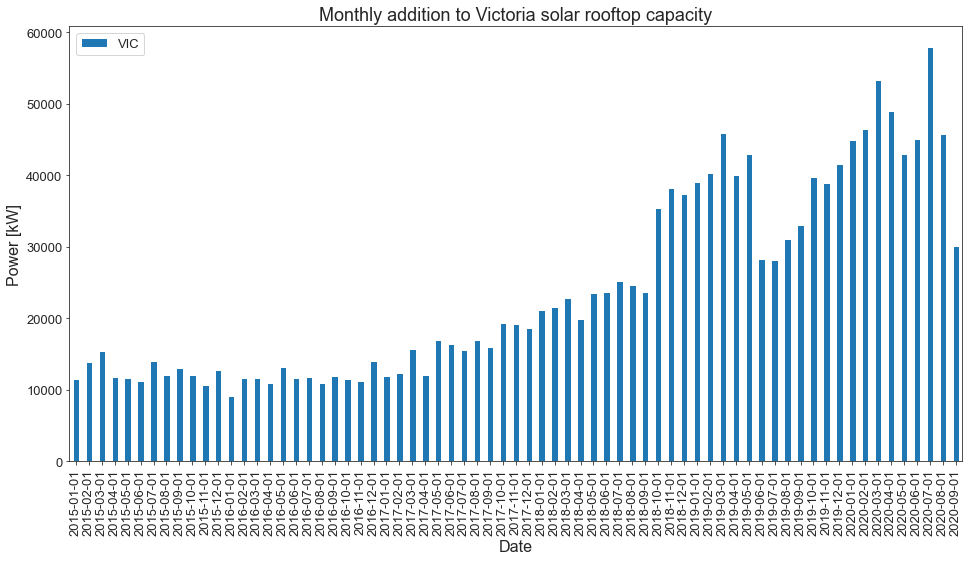

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")

params = {'axes.labelsize': 16,
              'axes.titlesize': 18,
              'font.size': 13}
plt.rcParams.update(params)

fig, ax = plt.subplots(1, 1, figsize = (16, 8))

df.plot(y = 'VIC', kind='bar', ax = ax)
ax.set_title('Monthly addition to Victoria solar rooftop capacity')
ax.set_xlabel("Date")
ax.set_ylabel('Power [kW]')

In [122]:
#df = df.reset_index()
df = df.set_index('Past GDP')
df

,NSW,VIC,QLD,WA,SA,TAS,NT,ACT
Past GDP,,,,,,,,
2015-01-01,12939,11487,15475,7970,5163,802,433,796
2015-02-01,15414,13856,15505,6738,5491,716,478,490
2015-03-01,18203,15387,17391,7573,5585,1254,557,488
2015-04-01,14001,11860,16107,7160,5145,620,817,559
2015-05-01,13979,11625,14831,7885,5124,514,428,401
...,...,...,...,...,...,...,...,...
2020-05-01,63353,42974,56918,22958,23439,1947,2519,3259
2020-06-01,72163,45164,61935,24797,22315,1909,2038,3190
2020-07-01,80272,57952,68259,27607,27432,2274,2266,4508


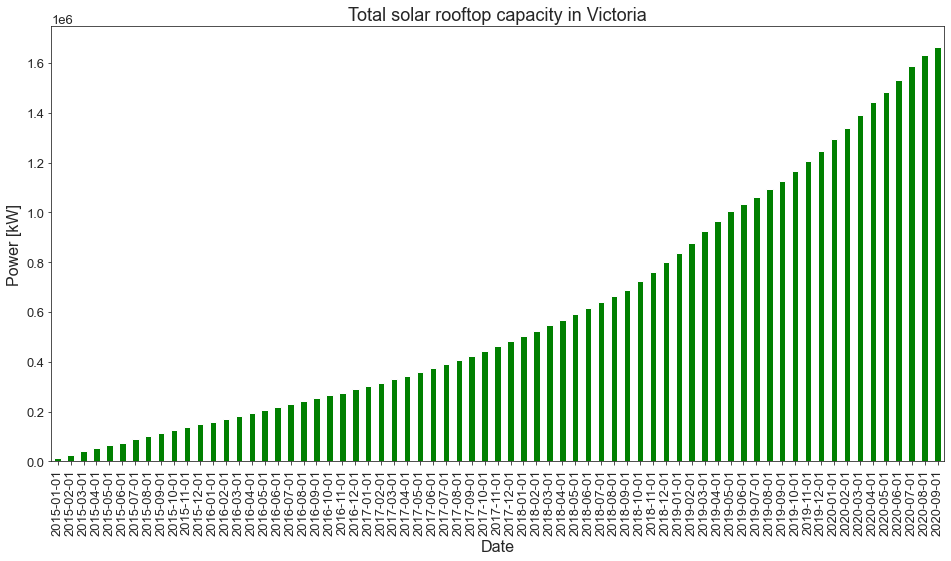

In [130]:
fig, ax = plt.subplots(1, 1, figsize = (16, 8))

df.cumsum().plot(y = 'VIC', kind='bar', ax = ax, color = 'green')
ax.set_title('Total solar rooftop capacity in Victoria')
ax.set_xlabel("Date")
ax.set_ylabel('Power [kW]')
ax.get_legend().remove()
None

It appear that as of September 2020 Victoria got a Hazelwood worth of rooftop solar. 

TODO: plot against solar hours per day (TODO: learn R to scrape it from BoM, they don't like Python)